# Tugas : Klasifikasi Data Partikel menggunakan KNN


In [1]:
import warnings
from matplotlib import rcParams
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
# plt.style.use('seaborn-talk')

# rcParams['figure.figsize'] = 15,7
plt.rc('figure', figsize=(12, 7))         # Image size


warnings.filterwarnings('ignore')

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth=3)
plt.rc('lines', linewidth=5)

plt.rc('lines', markersize=10)

plt.rc('figure', figsize=(10, 5))         # Image size

In [3]:
def grid(x1, x2, off_set=.1, n_points=100):
    # d s show the range in the two varible.
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()

    x1_min, x1_max = x1.min() - off_set * d1, x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2, x2.max() + off_set * d2

    # This function from numpy gives a list of coordinates that are the points on the grid.
    x, y = np.meshgrid(np.arange(x1_min, x1_max, d1/n_points),
                       np.arange(x2_min, x2_max, d2/n_points))

    return x, y

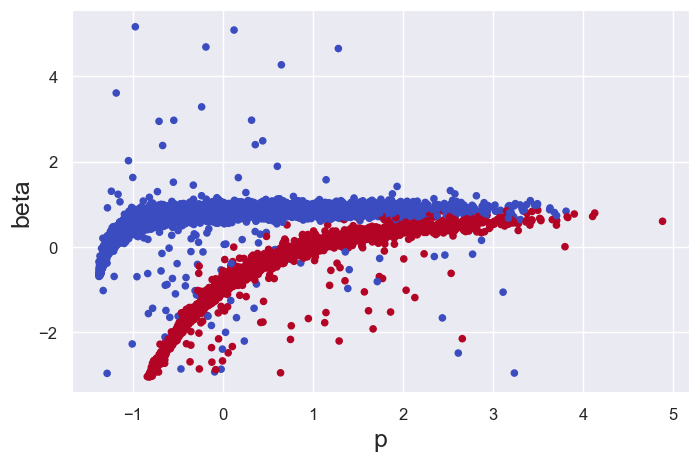

In [4]:
# @title Data for Particle identification (Binary)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import io
import requests
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s = requests.get(url, stream=True).content
data = np.load(io.BytesIO(s))

X, Y = data['X'], data['Y']

X = scale(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

x_label = 'p'
y_label = 'beta'
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, xlabel='p', ylabel='beta')
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20)

plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# Do the rest: Train the model, calculate the accuracy on the test and train data.
clf.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

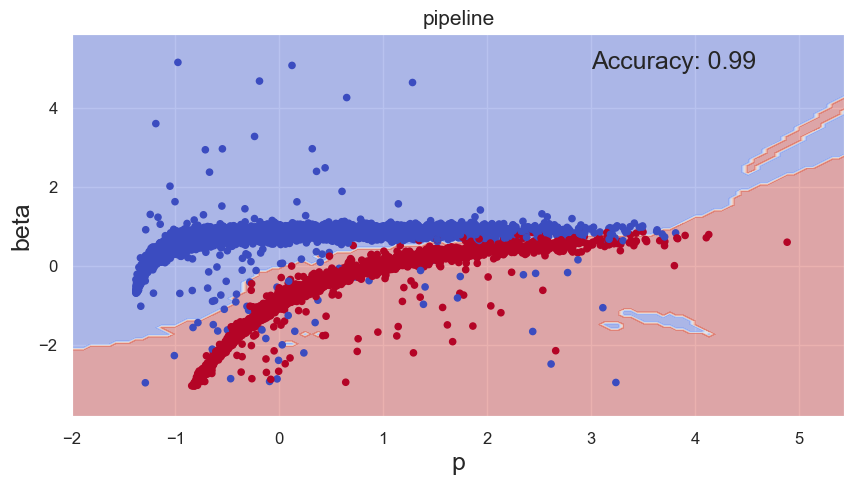

In [26]:

x1_list, x2_list = grid(X[:, 0], X[:, 1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1), x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, xlabel='p', ylabel='beta', title='pipeline')
Y_grid = clf.predict(X_grid).reshape(x1_list.shape)

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
ax.text(3, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')
plt.show()

Model Accuracy: 0.991180176396472


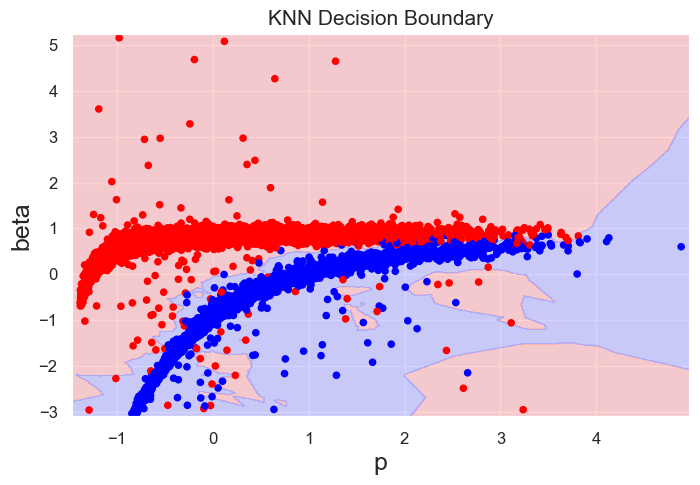

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt

# Generate some synthetic data for demonstration
from sklearn.datasets import make_classification
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = knn.predict(X_test)

# Evaluate the model by calculating accuracy
accuracy = (Y_pred == Y_test).mean()
print('Model Accuracy:', accuracy)

# Create a mesh grid of points to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_points, s=20)
plt.title("KNN Decision Boundary")
plt.xlabel("p")
plt.ylabel("beta")
plt.show()

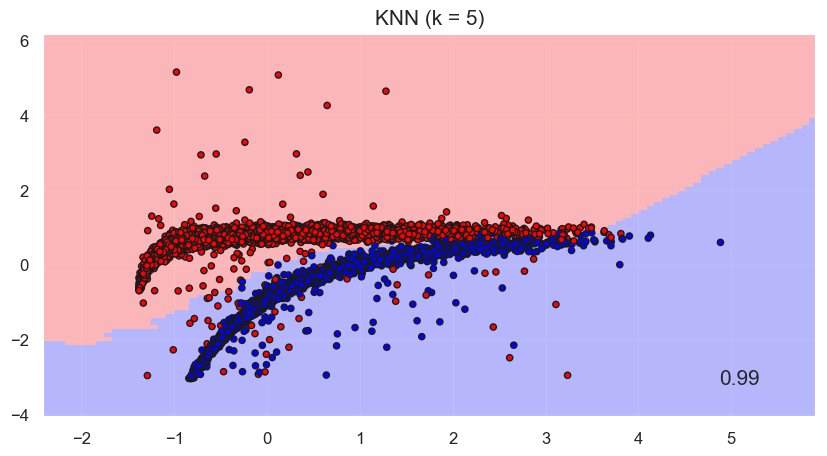

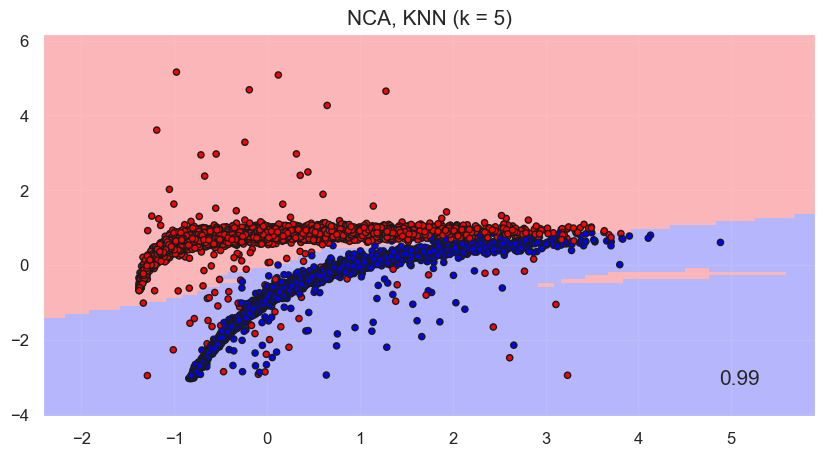

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_neighbors = 5


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()
